In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
pd.set_option("display.max_columns", 100)
import os
import geojson

In [2]:
from geojson import Feature, FeatureCollection

In [4]:
datapath = "/Users/nesara/Documents/etc/airbnb/data/cities/"
citiespath = [x[0] for x in os.walk(datapath)]
citiespath = citiespath[1:]

In [5]:
dfl = pd.DataFrame()

for i in range(len(citiespath)):
    df = pd.read_csv(citiespath[i] + "/listings.csv")
    df["city"] = citiespath[i].split("/")[-1]
    dfl = dfl.append(df)

/Users/nesara/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [6]:
#dfl.to_csv("/Users/nesara/Documents/etc/airbnb/data/all_listings.csv")

In [3]:
dfl = pd.read_csv("/Users/nesara/Documents/etc/airbnb/data/all_listings.csv")

/Users/nesara/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dfl["city"].unique()

array(['Barcelona', 'Paris', 'Austin', 'Melbourne', 'Santa Cruz County',
       'Mallorca', 'Dublin', 'New Orleans', 'Asheville', 'Victoria',
       'Hong Kong', 'Seattle', 'Chicago', 'Montreal', 'Los Angeles',
       'Portland', 'Sydney', 'Northern Rivers', 'Madrid', 'Geneva',
       'Tasmania', 'Boston', 'Antwerp', 'Vienna', 'Vancouver',
       'San Diego', 'Venice', 'Denver', 'Washington, D.C.', 'Toronto',
       'Edinburgh', 'London', 'San Francisco', 'Berlin', 'Rome',
       'Amsterdam', 'New York City', 'Manchester', 'Copenhagen',
       'Quebec City', 'Athens', 'Oakland', 'Nashville', 'Brussels'],
      dtype=object)

In [5]:
excluded_cities = ["Santa Cruz County", "Victoria", "Northern Rivers", "Tasmania" ,"Hong Kong"]

### Number of listings histogram

In [12]:
dflc = dfl.groupby("city").count()["id"].sort_values(ascending=False).reset_index()
dflc.rename(columns={"id":"numlistings"}, inplace=True)
dflc["numresidents"] = np.NaN
dflc

,city,numlistings,numresidents
0,Paris,59945,NaN
1,London,53904,NaN
2,New York City,48852,NaN
3,Sydney,32830,NaN
4,Los Angeles,31253,NaN
5,Rome,25275,NaN
6,Berlin,20576,NaN
7,Copenhagen,20545,NaN
8,Amsterdam,18547,NaN
9,Barcelona,18531,NaN


### Population of cities

In [13]:
dflc.loc[dflc["city"]=="New York City", "numresidents"] = 8622698
dflc.loc[dflc["city"]=="London", "numresidents"] = 8787892
dflc.loc[dflc["city"]=="Paris", "numresidents"] = 10601122
dflc.loc[dflc["city"]=="Sydney", "numresidents"] = 4321535
dflc.loc[dflc["city"]=="Los Angeles", "numresidents"] = 3999759
dflc.loc[dflc["city"]=="Rome", "numresidents"] = 2879038
dflc.loc[dflc["city"]=="Berlin", "numresidents"] = 3711930
dflc.loc[dflc["city"]=="Copenhagen", "numresidents"] = 602481
dflc.loc[dflc["city"]=="Amsterdam", "numresidents"] = 856928 
dflc.loc[dflc["city"]=="Barcelona", "numresidents"] = 1602386
dflc.loc[dflc["city"]=="Madrid", "numresidents"] = 3165235
dflc.loc[dflc["city"]=="Mallorca", "numresidents"] = 859289
dflc.loc[dflc["city"]=="Melbourne", "numresidents"] = 4196198
dflc.loc[dflc["city"]=="Toronto", "numresidents"] = 2731579
dflc.loc[dflc["city"]=="Montreal", "numresidents"] = 1704694
dflc.loc[dflc["city"]=="Austin", "numresidents"] = 950715	
dflc.loc[dflc["city"]=="Vienna", "numresidents"] = 1877836
dflc.loc[dflc["city"]=="Washington, D.C.", "numresidents"] = 693972
dflc.loc[dflc["city"]=="Dublin", "numresidents"] = 1173179
dflc.loc[dflc["city"]=="Vancouver", "numresidents"] = 631486
dflc.loc[dflc["city"]=="San Diego", "numresidents"] = 1419516
dflc.loc[dflc["city"]=="Hong Kong", "numresidents"] = 7409800
dflc.loc[dflc["city"]=="Edinburgh", "numresidents"] = 1339380
dflc.loc[dflc["city"]=="Brussels", "numresidents"] = 1171828
dflc.loc[dflc["city"]=="Venice", "numresidents"] = 270884
dflc.loc[dflc["city"]=="Nashville", "numresidents"] = 667560
dflc.loc[dflc["city"]=="New Orleans", "numresidents"] = 393292
dflc.loc[dflc["city"]=="Chicago", "numresidents"] = 2716450
dflc.loc[dflc["city"]=="Athens", "numresidents"] = 664046
dflc.loc[dflc["city"]=="Boston", "numresidents"] = 685094
dflc.loc[dflc["city"]=="San Francisco", "numresidents"] = 884363
dflc.loc[dflc["city"]=="Portland", "numresidents"] = 647805
dflc.loc[dflc["city"]=="Tasmania", "numresidents"] = 519100
dflc.loc[dflc["city"]=="Denver", "numresidents"] = 704621
dflc.loc[dflc["city"]=="Seattle", "numresidents"] = 724745	
dflc.loc[dflc["city"]=="Geneva", "numresidents"] = 198979
dflc.loc[dflc["city"]=="Northern Rivers", "numresidents"] = 296531
dflc.loc[dflc["city"]=="Quebec City", "numresidents"] = 531902
dflc.loc[dflc["city"]=="Oakland", "numresidents"] = 412040
dflc.loc[dflc["city"]=="Victoria", "numresidents"] = 80017
dflc.loc[dflc["city"]=="Antwerp", "numresidents"] = 520504
dflc.loc[dflc["city"]=="Manchester", "numresidents"] = 530300
dflc.loc[dflc["city"]=="Asheville", "numresidents"] = 89121
dflc.loc[dflc["city"]=="Santa Cruz County", "numresidents"] = 262382

In [14]:
dflc["numlistingsPerResidents"] = dflc["numlistings"]/dflc["numresidents"]*100
dflc = dflc[-dflc["city"].isin(excluded_cities)].copy()
dflc

,city,numlistings,numresidents,numlistingsPerResidents
0,Paris,59945,10601122.0,0.565459
1,London,53904,8787892.0,0.613389
2,New York City,48852,8622698.0,0.566551
3,Sydney,32830,4321535.0,0.759684
4,Los Angeles,31253,3999759.0,0.781372
5,Rome,25275,2879038.0,0.877897
6,Berlin,20576,3711930.0,0.554321
7,Copenhagen,20545,602481.0,3.410066
8,Amsterdam,18547,856928.0,2.164359
9,Barcelona,18531,1602386.0,1.156463


In [15]:
listings1_excluded_cities = ["Austin", "Antwerp", "Oakland", "Portland", "Athens", "Montreal", 
                             "San Diego", "Nashville", "Athens", "Quebec city", "Manchester", "Asheville"]
dflc = dflc[-dflc["city"].isin(listings1_excluded_cities)]

### Save files

In [51]:
dflc = dflc.set_index("city").sort_values(by="numlistings", ascending=False).reset_index()
dflc[["city", "numlistings"]].to_csv("../code/startbootstrap-grayscale-gh-pages/data/listings1_1.csv", index=False)

In [52]:
dflc = dflc.set_index("city").sort_values(by="numlistingsPerResidents", ascending=False).reset_index()
dflc[["city", "numlistingsPerResidents"]].to_csv("../code/startbootstrap-grayscale-gh-pages/data/listings1_2.csv", index=False)

### Number of listings: circle packing

In [47]:
import csv

dfl_all = dflc.sort_values("numlistings",ascending=False)[:20]
dfl_all
lines = []
lines.append("id,value")
lines.append("city")
for i in range(len(dfl_all)):
    lines.append("city." + dfl_all.iloc[i]["city"] + "," + str(dfl_all.iloc[i]["numlistings"]) )
lines

with open('../code/data/circle_packing_listingsAll.csv', 'w') as fp:  
    writer = csv.writer(fp)
    writer.writerow(["id","value","city","price"])
    for i in range(len(dfl_all)):
        line = 'city.' + dfl_all.iloc[i]["city"] + ',' + str(dfl_all.iloc[i]["numlistings"])
        writer.writerow([line])        

### Total number of listings

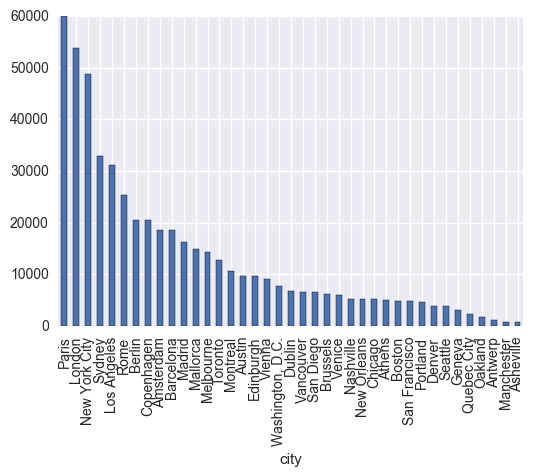

In [55]:
dfll = dfl[-dfl["city"].isin(excluded_cities)]
dfll.groupby("city").count()["id"].sort_values(ascending=False).plot(kind="bar")

### Number of listings per number of residents

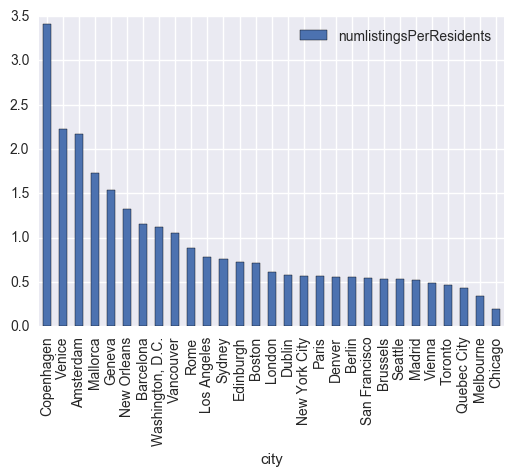

In [54]:
dflc[["city","numlistingsPerResidents"]].set_index("city").sort_values(by="numlistingsPerResidents", ascending=False).plot(kind="bar")

### Density of listings

In [90]:
def csv2geojson_listings(dfl, city):
    ### Write csv data to geojson file
    
    dfl.loc[dfl["room_type"]=="Entire home/apt","room_type_enc"] = 0
    dfl.loc[dfl["room_type"]=="Private room","room_type_enc"] = 1
    dfl.loc[dfl["room_type"]=="Shared room","room_type_enc"] = 2
    
    features = []
    for i in range(len(dfl)):
        coordinates = [dfl.iloc[i]["longitude"], dfl.iloc[i]["latitude"]]

        features.append(
            Feature(
                geometry = {
                    'type': "Point",
                    'coordinates': geojson.Point((coordinates)),  
                },
                properties = {
                    'id': int(dfl.iloc[i]["id"]),
                    #'name': dfl.iloc[i]["name"],
                    #'host_id': int(dfl.iloc[i]["host_id"]),
                    #'host_name': dfl.iloc[i]["host_name"],
                    #'neighbourhood_group': dfl.iloc[i]["neighbourhood_group"],
                    #'neighbourhood': dfl.iloc[i]["neighbourhood"],
                    'room_type': int(dfl.iloc[i]["room_type_enc"]),
                    'price': int(dfl.iloc[i]["price"]),
                    #'availability_365': int(dfl.iloc[i]["availability_365"]),
                }
            )
        )
    collection = FeatureCollection(features)
    with open("/Users/nesara/Documents/etc/airbnb/data/cities/"+city+"/listings.geojson", "w") as f:
        f.write('%s' % collection)

In [129]:
def csv2geojson_numlistings(dfn, city):
    features = []
    for i in range(len(dfn)):
        if dfn.iloc[i]["features"]["geometry"]:
            coordinates = dfn.iloc[i]["features"]["geometry"]["coordinates"]

            features.append(
                Feature(
                    geometry = {
                        'type': "MultiPolygon",
                        'coordinates': geojson.MultiPolygon((coordinates)),  
                    },
                    properties = {
                        'neighbourhood': dfn.iloc[i]["features"]["properties"]["neighbourhood"],
                        'neighbourhood_group': dfn.iloc[i]["features"]["properties"]["neighbourhood_group"],
                        'num_listings': int(dfn.iloc[i]["features"]["properties"]["num_listings"])
                    }
                )
            )
    collection = FeatureCollection(features)
    with open("/Users/nesara/Documents/etc/airbnb/data/cities/"+city+"/neighbourhoods_numlistings.geojson", "w") as f:
        f.write('%s' % collection)

In [5]:
allListings = pd.read_csv("/Users/nesara/Documents/etc/airbnb/data/all_listings.csv")

/Applications/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [133]:
for city in allListings["city"].unique()[20:]:
    print(city)
    ### Read listings file and count number of listings
    dfl = pd.read_csv("/Users/nesara/Documents/etc/airbnb/data/cities/"+city+"/listings.csv")

    ### Write listings data to a geojson file (to plot using Mapbox GL using lat,long)
    csv2geojson_listings(dfl, city)
    
    dflc = dfl.groupby("neighbourhood").count()["id"].reset_index()
    dflc.rename(columns={"id":"num_listings"}, inplace=True)
    
    ### Read neighbourhood geojson file
    dfn = pd.read_json("/Users/nesara/Documents/etc/airbnb/data/cities/"+city+"/neighbourhoods.geojson")
    dfl["neighbourhood"] = dfl["neighbourhood"].astype(str)
    dflc["neighbourhood"] = dflc["neighbourhood"].astype(str)
    
    ### Append number of listings data
    for i in range(len(dfn)):
        neighbourhood = dfn.iloc[i]["features"]["properties"]["neighbourhood"]
        if len(dfl[dfl["neighbourhood"]==neighbourhood])!=0:
            num_listings = dflc[dflc["neighbourhood"]==neighbourhood]["num_listings"].values[0]
        else:
            num_listings = 0
        dfn.iloc[i]["features"]["properties"]["num_listings"] = num_listings
    
    ### Write results as a FeatureCollection to a geojson filefrom geojson import Feature, FeatureCollection, Point
    csv2geojson_numlistings(dfn, city)

Tasmania
Boston
Antwerp
Vienna
Vancouver
San Diego
Venice
Denver
Washington, D.C.
Toronto
Edinburgh
London
San Francisco
Berlin
Rome
Amsterdam
New York City
Manchester
Copenhagen
Quebec City
Athens
Oakland
Nashville
Brussels


### Center coordinates of cities

In [136]:
allListings["city"].unique()

array(['Barcelona', 'Paris', 'Austin', 'Melbourne', 'Santa Cruz County',
       'Mallorca', 'Dublin', 'New Orleans', 'Asheville', 'Victoria',
       'Hong Kong', 'Seattle', 'Chicago', 'Montreal', 'Los Angeles',
       'Portland', 'Sydney', 'Northern Rivers', 'Madrid', 'Geneva',
       'Tasmania', 'Boston', 'Antwerp', 'Vienna', 'Vancouver', 'San Diego',
       'Venice', 'Denver', 'Washington, D.C.', 'Toronto', 'Edinburgh',
       'London', 'San Francisco', 'Berlin', 'Rome', 'Amsterdam',
       'New York City', 'Manchester', 'Copenhagen', 'Quebec City',
       'Athens', 'Oakland', 'Nashville', 'Brussels'], dtype=object)

In [162]:
#dfll = pd.DataFrame()
dfll = {}
idx = 0
for city in allListings["city"].unique():
    dft = allListings[allListings["city"]==city]
    #dfll.at[idx, "city"] = city
    #dfll.at[idx, "latitude"] = dft["latitude"].mean() 
    #dfll.at[idx, "longitude"] = dft["longitude"].mean()
    dfll[city] = [dft["longitude"].mean(), dft["latitude"].mean()]
    idx += 1

In [163]:
dfll

{'Amsterdam': [4.888966107423247, 52.365016079866514],
 'Antwerp': [4.4139292272680315, 51.21378555624961],
 'Asheville': [-82.5587339314082, 35.58184654887986],
 'Athens': [23.733934324075236, 37.98119798246257],
 'Austin': [-97.75133593986969, 30.27605926262372],
 'Barcelona': [2.16711400548186, 41.39243462700611],
 'Berlin': [13.407150440988978, 52.5096704706105],
 'Boston': [-71.08394332204757, 42.3399986684652],
 'Brussels': [4.363338150969672, 50.83797601447168],
 'Chicago': [-87.66352711414041, 41.906927834816614],
 'Copenhagen': [12.557519057929465, 55.681294015165015],
 'Denver': [-104.97656336110967, 39.73798024121983],
 'Dublin': [-6.2537809488665745, 53.34431179562305],
 'Edinburgh': [-3.1973785954433964, 55.950857265335024],
 'Geneva': [6.1440413105530665, 46.20549787348727],
 'Hong Kong': [114.15933711880362, 22.301690926324323],
 'London': [-0.12710484279376477, 51.51042472724741],
 'Los Angeles': [-118.33425165122814, 34.05622035779748],
 'Madrid': [-3.696779311601697, 

In [171]:
320/1.5

213.33333333333334

In [172]:
240/1.5

160.0

### US vs EU: Price histogram

In [21]:
dfl = pd.read_csv("/Users/nesara/Documents/etc/airbnb/data/all_listings.csv")

/Users/nesara/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
#US/Canada:0 EU:1 Australia:2 Rest:3
dfl.loc[dfl["city"]=="New York City", "us_eu"] = 0
dfl.loc[dfl["city"]=="London", "us_eu"] = 1
dfl.loc[dfl["city"]=="Paris", "us_eu"] = 1
dfl.loc[dfl["city"]=="Sydney", "us_eu"] = 2
dfl.loc[dfl["city"]=="Los Angeles", "us_eu"] = 0
dfl.loc[dfl["city"]=="Rome", "us_eu"] = 1
dfl.loc[dfl["city"]=="Berlin", "us_eu"] = 1
dfl.loc[dfl["city"]=="Copenhagen", "us_eu"] = 1
dfl.loc[dfl["city"]=="Amsterdam", "us_eu"] = 1 
dfl.loc[dfl["city"]=="Barcelona", "us_eu"] = 1
dfl.loc[dfl["city"]=="Madrid", "us_eu"] = 1
dfl.loc[dfl["city"]=="Mallorca", "us_eu"] = 1
dfl.loc[dfl["city"]=="Melbourne", "us_eu"] = 2
dfl.loc[dfl["city"]=="Toronto", "us_eu"] = 0
dfl.loc[dfl["city"]=="Montreal", "us_eu"] = 0
dfl.loc[dfl["city"]=="Austin", "us_eu"] = 0
dfl.loc[dfl["city"]=="Vienna", "us_eu"] = 1
dfl.loc[dfl["city"]=="Washington, D.C.", "us_eu"] = 0
dfl.loc[dfl["city"]=="Dublin", "us_eu"] = 1
dfl.loc[dfl["city"]=="Vancouver", "us_eu"] = 0
dfl.loc[dfl["city"]=="San Diego", "us_eu"] = 0
dfl.loc[dfl["city"]=="Hong Kong", "us_eu"] = 3
dfl.loc[dfl["city"]=="Edinburgh", "us_eu"] = 1
dfl.loc[dfl["city"]=="Brussels", "us_eu"] = 1
dfl.loc[dfl["city"]=="Venice", "us_eu"] = 1
dfl.loc[dfl["city"]=="Nashville", "us_eu"] = 0
dfl.loc[dfl["city"]=="New Orleans", "us_eu"] = 0
dfl.loc[dfl["city"]=="Chicago", "us_eu"] = 0
dfl.loc[dfl["city"]=="Athens", "us_eu"] = 1
dfl.loc[dfl["city"]=="Boston", "us_eu"] = 0
dfl.loc[dfl["city"]=="San Francisco", "us_eu"] = 0
dfl.loc[dfl["city"]=="Portland", "us_eu"] = 0
dfl.loc[dfl["city"]=="Tasmania", "us_eu"] = 2
dfl.loc[dfl["city"]=="Denver", "us_eu"] = 0
dfl.loc[dfl["city"]=="Seattle", "us_eu"] = 0
dfl.loc[dfl["city"]=="Geneva", "us_eu"] = 1
dfl.loc[dfl["city"]=="Northern Rivers", "us_eu"] = 2
dfl.loc[dfl["city"]=="Quebec City", "us_eu"] = 0
dfl.loc[dfl["city"]=="Oakland", "us_eu"] = 0
dfl.loc[dfl["city"]=="Victoria", "us_eu"] = 2
dfl.loc[dfl["city"]=="Antwerp", "us_eu"] = 1
dfl.loc[dfl["city"]=="Manchester", "us_eu"] = 1
dfl.loc[dfl["city"]=="Asheville", "us_eu"] = 0
dfl.loc[dfl["city"]=="Santa Cruz County", "us_eu"] = 0

In [18]:
dfl["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

### Private room

(array([   55.,   211.,  1800.,  5220.,  8419., 10112.,  8861.,  7981.,
         5684.,  4687.,  3476.,  1468.,  2147.,   805.,   628.,  1392.,
          299.,   392.,   281.,   252.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 <a list of 20 Patch objects>)

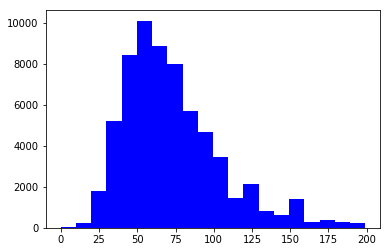

In [19]:
dft = dfl[(dfl["price"]>=0) & (dfl["price"]<200)]
plt.hist(dft[(dft["us_eu"]==0) & (dft["room_type"]=="Private room")]["price"],bins=20, color='b')

(array([   67.,  3566., 15255., 19893., 15957., 11439.,  7500.,  5033.,
         3530.,  2254.,  1701.,   742.,   976.,   429.,   367.,   619.,
          200.,   191.,   147.,   204.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 <a list of 20 Patch objects>)

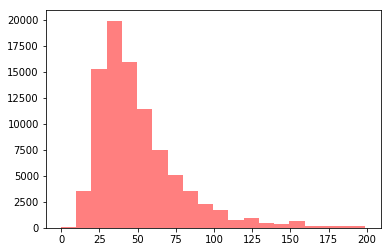

In [20]:
dft = dfl[(dfl["price"]>=0) & (dfl["price"]<200)]
plt.hist(dft[(dft["us_eu"]==1) & (dft["room_type"]=="Private room")]["price"],bins=20, alpha=0.5, color='r')

### Saving data 

In [30]:
bins =   [  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 200.  ]
bins = np.ceil(bins)
num_rooms_eu = [   67.,  3566., 15255., 19893., 15957., 11439.,  7500.,  5033.,
         3530.,  2254.,  1701.,   742.,   976.,   429.,   367.,   619.,
          200.,   191.,   147.,   204.]
num_rooms_us = [   55.,   211.,  1800.,  5220.,  8419., 10112.,  8861.,  7981.,
         5684.,  4687.,  3476.,  1468.,  2147.,   805.,   628.,  1392.,
          299.,   392.,   281.,   252.]
df = pd.DataFrame()
df["bins"] = bins[1:]
df["num_listings_us"] = num_rooms_us
df["num_listings_eu"] = num_rooms_eu

# Additional dummy entries
idx = df.index[-1]+1
for i in range(20):
    df.at[idx, "bins"] = 200 + (i+1)*10
    df.at[idx, "num_listings_us"] = 0
    df.at[idx, "num_listings_eu"] = 0
    idx += 1

df["num_listings_us"] = df["num_listings_us"].astype(int)
df["num_listings_eu"] = df["num_listings_eu"].astype(int)
df["bins"] = df["bins"].astype(int)
df.to_csv("../code/data/histogram_privateRoom.csv", index=False)

df

,bins,num_listings_us,num_listings_eu
0,10,55,67
1,20,211,3566
2,30,1800,15255
3,40,5220,19893
4,50,8419,15957
5,60,10112,11439
6,70,8861,7500
7,80,7981,5033
8,90,5684,3530
9,100,4687,2254


In [27]:
df.index[-1]

19

In [100]:
dfl["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [175]:
print(dfl[(dfl["us_eu"]==0) & (dfl["room_type"]=="Private room")]["price"].median())
print(dfl[(dfl["us_eu"]==1) & (dfl["room_type"]=="Private room")]["price"].median())

68.0
45.0


In [179]:
print(dfl[(dfl["us_eu"]==0) & (dfl["room_type"]=="Entire home/apt")]["price"].median())
print(dfl[(dfl["us_eu"]==1) & (dfl["room_type"]=="Entire home/apt")]["price"].median())

150.0
99.0


In [180]:
print(dfl[(dfl["us_eu"]==0) & (dfl["room_type"]=="Shared room")]["price"].median())
print(dfl[(dfl["us_eu"]==1) & (dfl["room_type"]=="Shared room")]["price"].median())

40.0
27.0


### Entire home

(array([  30.,   50.,   73.,  237.,  742., 1708., 2855., 4690., 5589.,
        8223., 6471., 4818., 7821., 4321., 4433., 6614., 2975., 3958.,
        2802., 3626., 4053.,  966., 2509.,  794., 1350., 3320.,  612.,
        1287.,  719., 1491., 2060.,  287.,  820.,  236.,  522., 1489.,
         206.,  493.,  247.,  668.]),
 array([  0.   ,   9.975,  19.95 ,  29.925,  39.9  ,  49.875,  59.85 ,
         69.825,  79.8  ,  89.775,  99.75 , 109.725, 119.7  , 129.675,
        139.65 , 149.625, 159.6  , 169.575, 179.55 , 189.525, 199.5  ,
        209.475, 219.45 , 229.425, 239.4  , 249.375, 259.35 , 269.325,
        279.3  , 289.275, 299.25 , 309.225, 319.2  , 329.175, 339.15 ,
        349.125, 359.1  , 369.075, 379.05 , 389.025, 399.   ]),
 <a list of 40 Patch objects>)

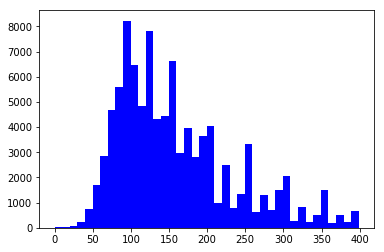

In [130]:
dft = dfl[(dfl["price"]>=0) & (dfl["price"]<400)]
plt.hist(dft[(dft["us_eu"]==0) & (dft["room_type"]=="Entire home/apt")]["price"],bins=40, color='b')

(array([   56.,   228.,  1751.,  5601., 11556., 15755., 17630., 17431.,
        16139., 15736., 11886.,  7760., 10360.,  5844.,  5351.,  7095.,
         3326.,  2942.,  2949.,  2494.,  3472.,   946.,  1636.,   859.,
          990.,  2279.,   552.,   608.,   640.,   828.,  1271.,   251.,
          396.,   269.,   277.,   961.,   201.,   235.,   212.,   703.]),
 array([  0.   ,   9.975,  19.95 ,  29.925,  39.9  ,  49.875,  59.85 ,
         69.825,  79.8  ,  89.775,  99.75 , 109.725, 119.7  , 129.675,
        139.65 , 149.625, 159.6  , 169.575, 179.55 , 189.525, 199.5  ,
        209.475, 219.45 , 229.425, 239.4  , 249.375, 259.35 , 269.325,
        279.3  , 289.275, 299.25 , 309.225, 319.2  , 329.175, 339.15 ,
        349.125, 359.1  , 369.075, 379.05 , 389.025, 399.   ]),
 <a list of 40 Patch objects>)

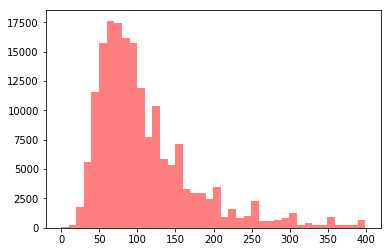

In [131]:
dft = dfl[(dfl["price"]>=0) & (dfl["price"]<400)]
plt.hist(dft[(dft["us_eu"]==1) & (dft["room_type"]=="Entire home/apt")]["price"],bins=40, alpha=0.5, color='r')

In [133]:
bins =   [  0.   ,   9.975,  19.95 ,  29.925,  39.9  ,  49.875,  59.85 ,
         69.825,  79.8  ,  89.775,  99.75 , 109.725, 119.7  , 129.675,
        139.65 , 149.625, 159.6  , 169.575, 179.55 , 189.525, 199.5  ,
        209.475, 219.45 , 229.425, 239.4  , 249.375, 259.35 , 269.325,
        279.3  , 289.275, 299.25 , 309.225, 319.2  , 329.175, 339.15 ,
        349.125, 359.6  , 369.575, 379.55 , 389.625, 400.   ]
bins = np.ceil(bins)
num_rooms_us = [  30.,   50.,   73.,  237.,  742., 1708., 2855., 4690., 5589.,
        8223., 6471., 4818., 7821., 4321., 4433., 6614., 2975., 3958.,
        2802., 3626., 4053.,  966., 2509.,  794., 1350., 3320.,  612.,
        1287.,  719., 1491., 2060.,  287.,  820.,  236.,  522., 1489.,
         206.,  493.,  247.,  668.]
num_rooms_eu = [   56.,   228.,  1751.,  5601., 11556., 15755., 17630., 17431.,
        16139., 15736., 11886.,  7760., 10360.,  5844.,  5351.,  7095.,
         3326.,  2942.,  2949.,  2494.,  3472.,   946.,  1636.,   859.,
          990.,  2279.,   552.,   608.,   640.,   828.,  1271.,   251.,
          396.,   269.,   277.,   961.,   201.,   235.,   212.,   703.]
df = pd.DataFrame()
df["bins"] = bins[1:]
df["num_listings_us"] = num_rooms_us
df["num_listings_eu"] = num_rooms_eu
df.to_csv("../code/data/histogram_entireApartment.csv", index=False)
df

,bins,num_listings_us,num_listings_eu
0,10.0,30.0,56.0
1,20.0,50.0,228.0
2,30.0,73.0,1751.0
3,40.0,237.0,5601.0
4,50.0,742.0,11556.0
5,60.0,1708.0,15755.0
6,70.0,2855.0,17630.0
7,80.0,4690.0,17431.0
8,90.0,5589.0,16139.0
9,100.0,8223.0,15736.0


(array([   2.,    0.,  113.,  279.,  311.,  405.,  369.,  218.,  203.,
          70.,  146.,   84.,  116.,   52.,   17.,   61.,   37.,   41.,
          23.,   14.,   26.,   12.,   10.,    8.,    5.,   30.,    5.,
           8.,    2.,    4.,   11.,    6.,    6.,    5.,    5.,    5.,
           3.,   10.,    6.,    5.,    3.,    0.,    1.,    9.,    2.,
           5.,   25.,    0.,    2.,    4.]),
 array([   0.  ,    3.98,    7.96,   11.94,   15.92,   19.9 ,   23.88,
          27.86,   31.84,   35.82,   39.8 ,   43.78,   47.76,   51.74,
          55.72,   59.7 ,   63.68,   67.66,   71.64,   75.62,   79.6 ,
          83.58,   87.56,   91.54,   95.52,   99.5 ,  103.48,  107.46,
         111.44,  115.42,  119.4 ,  123.38,  127.36,  131.34,  135.32,
         139.3 ,  143.28,  147.26,  151.24,  155.22,  159.2 ,  163.18,
         167.16,  171.14,  175.12,  179.1 ,  183.08,  187.06,  191.04,
         195.02,  199.  ]),
 <a list of 50 Patch objects>)

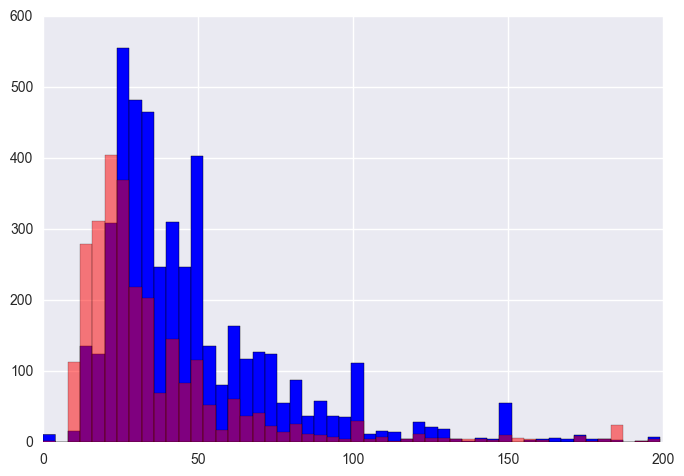

In [183]:
dft = dfl[(dfl["price"]>=0) & (dfl["price"]<200)]
plt.hist(dft[(dft["us_eu"]==0) & (dft["room_type"]=="Shared room")]["price"],bins=50, color='b')
plt.hist(dft[(dft["us_eu"]==1) & (dft["room_type"]=="Shared room")]["price"],bins=50, alpha=0.5, color='r')

### City wise median and range

#### Local currency to USD conversion factor

In [54]:
dfl.loc[dfl["city"]=="New York City", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="London", "localcurrency_usd_factor"] = 1.32
dfl.loc[dfl["city"]=="Paris", "localcurrency_usd_factor"] = 1.15
dfl.loc[dfl["city"]=="Sydney", "localcurrency_usd_factor"] = 0.74
dfl.loc[dfl["city"]=="Los Angeles", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="Rome", "localcurrency_usd_factor"] = 1.15
dfl.loc[dfl["city"]=="Berlin", "localcurrency_usd_factor"] = 1.15
dfl.loc[dfl["city"]=="Copenhagen", "localcurrency_usd_factor"] = 0.15
dfl.loc[dfl["city"]=="Amsterdam", "localcurrency_usd_factor"] =  1.15
dfl.loc[dfl["city"]=="Barcelona", "localcurrency_usd_factor"] = 1.15
dfl.loc[dfl["city"]=="Madrid", "localcurrency_usd_factor"] = 1.15
dfl.loc[dfl["city"]=="Mallorca", "localcurrency_usd_factor"] = 1.15
dfl.loc[dfl["city"]=="Melbourne", "localcurrency_usd_factor"] = 0.74
dfl.loc[dfl["city"]=="Toronto", "localcurrency_usd_factor"] = 0.75
dfl.loc[dfl["city"]=="Montreal", "localcurrency_usd_factor"] = 0.75
dfl.loc[dfl["city"]=="Austin", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="Vienna", "localcurrency_usd_factor"] = 1.15
dfl.loc[dfl["city"]=="Washington, D.C.", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="Dublin", "localcurrency_usd_factor"] = 1.32
dfl.loc[dfl["city"]=="Vancouver", "localcurrency_usd_factor"] = 0.75
dfl.loc[dfl["city"]=="San Diego", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="Hong Kong", "localcurrency_usd_factor"] = 0.13
dfl.loc[dfl["city"]=="Edinburgh", "localcurrency_usd_factor"] = 1.32
dfl.loc[dfl["city"]=="Brussels", "localcurrency_usd_factor"] = 1.15
dfl.loc[dfl["city"]=="Venice", "localcurrency_usd_factor"] = 1.15
dfl.loc[dfl["city"]=="Nashville", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="New Orleans", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="Chicago", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="Athens", "localcurrency_usd_factor"] = 1.15
dfl.loc[dfl["city"]=="Boston", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="San Francisco", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="Portland", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="Tasmania", "localcurrency_usd_factor"] = 0.74
dfl.loc[dfl["city"]=="Denver", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="Seattle", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="Geneva", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="Northern Rivers", "localcurrency_usd_factor"] = 0.74
dfl.loc[dfl["city"]=="Quebec City", "localcurrency_usd_factor"] = 0.75
dfl.loc[dfl["city"]=="Oakland", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="Victoria", "localcurrency_usd_factor"] = 0.74
dfl.loc[dfl["city"]=="Antwerp", "localcurrency_usd_factor"] = 1.15
dfl.loc[dfl["city"]=="Manchester", "localcurrency_usd_factor"] = 1.32
dfl.loc[dfl["city"]=="Asheville", "localcurrency_usd_factor"] = 1
dfl.loc[dfl["city"]=="Santa Cruz County", "localcurrency_usd_factor"] = 1

In [55]:
dfl.loc[dfl["city"]=="New York City", "avg_hotel_price"] = 245
dfl.loc[dfl["city"]=="London", "avg_hotel_price"] = 252
dfl.loc[dfl["city"]=="Paris", "avg_hotel_price"] = 214
dfl.loc[dfl["city"]=="Sydney", "avg_hotel_price"] = 185
dfl.loc[dfl["city"]=="Los Angeles", "avg_hotel_price"] = 175
dfl.loc[dfl["city"]=="Rome", "avg_hotel_price"] = 167
dfl.loc[dfl["city"]=="Berlin", "avg_hotel_price"] = 128
dfl.loc[dfl["city"]=="Copenhagen", "avg_hotel_price"] = 190
dfl.loc[dfl["city"]=="Amsterdam", "avg_hotel_price"] = 191
dfl.loc[dfl["city"]=="Barcelona", "avg_hotel_price"] = 172
dfl.loc[dfl["city"]=="Madrid", "avg_hotel_price"] = 132
#dfl.loc[dfl["city"]=="Mallorca", "avg_hotel_price"] = 
dfl.loc[dfl["city"]=="Melbourne", "avg_hotel_price"] = 177
dfl.loc[dfl["city"]=="Toronto", "avg_hotel_price"] = 148
#dfl.loc[dfl["city"]=="Montreal", "avg_hotel_price"] = 
dfl.loc[dfl["city"]=="Austin", "avg_hotel_price"] = 160
dfl.loc[dfl["city"]=="Vienna", "avg_hotel_price"] = 147
dfl.loc[dfl["city"]=="Washington, D.C.", "avg_hotel_price"] = 173
dfl.loc[dfl["city"]=="Dublin", "avg_hotel_price"] = 140
dfl.loc[dfl["city"]=="Vancouver", "avg_hotel_price"] = 177
dfl.loc[dfl["city"]=="San Diego", "avg_hotel_price"] = 152
#dfl.loc[dfl["city"]=="Hong Kong", "avg_hotel_price"] = 
dfl.loc[dfl["city"]=="Edinburgh", "avg_hotel_price"] = 118
dfl.loc[dfl["city"]=="Brussels", "avg_hotel_price"] = 121
dfl.loc[dfl["city"]=="Venice", "avg_hotel_price"] = 233
dfl.loc[dfl["city"]=="Nashville", "avg_hotel_price"] = 178
dfl.loc[dfl["city"]=="New Orleans", "avg_hotel_price"] = 191
dfl.loc[dfl["city"]=="Chicago", "avg_hotel_price"] = 179
#dfl.loc[dfl["city"]=="Athens", "avg_hotel_price"] = 
dfl.loc[dfl["city"]=="Boston", "avg_hotel_price"] = 213
dfl.loc[dfl["city"]=="San Francisco", "avg_hotel_price"] = 217
dfl.loc[dfl["city"]=="Portland", "avg_hotel_price"] = 149
#dfl.loc[dfl["city"]=="Tasmania", "avg_hotel_price"] = 
#dfl.loc[dfl["city"]=="Denver", "avg_hotel_price"] = 
dfl.loc[dfl["city"]=="Seattle", "avg_hotel_price"] = 195
dfl.loc[dfl["city"]=="Geneva", "avg_hotel_price"] = 243
#dfl.loc[dfl["city"]=="Northern Rivers", "avg_hotel_price"] = 
#dfl.loc[dfl["city"]=="Quebec City", "avg_hotel_price"] = 
#dfl.loc[dfl["city"]=="Oakland", "avg_hotel_price"] = 
#dfl.loc[dfl["city"]=="Victoria", "avg_hotel_price"] = 
#dfl.loc[dfl["city"]=="Antwerp", "avg_hotel_price"] = 
#dfl.loc[dfl["city"]=="Manchester", "avg_hotel_price"] = 
#dfl.loc[dfl["city"]=="Asheville", "avg_hotel_price"] = 
#dfl.loc[dfl["city"]=="Santa Cruz County", "avg_hotel_price"] = 

In [107]:
dfc = pd.DataFrame()
idx = 0
for city in dfl["city"].unique():
    df = dfl[dfl["city"]==city]
    localcurrency_usd_factor = df["localcurrency_usd_factor"].unique()[0]
    dfc.at[idx, "city"] = city
    dfc.at[idx, "us_eu"] = int(df[df["city"]==city]["us_eu"].values[0])
    dfc.at[idx, "median_privateroom"] = df[df["room_type"]=="Private room"]["price"].median() * localcurrency_usd_factor
    dfc.at[idx, "median_entirehome"] = df[df["room_type"]=="Entire home/apt"]["price"].median() * localcurrency_usd_factor
    dfc.at[idx, "median_sharedroom"] = df[df["room_type"]=="Shared room"]["price"].median() * localcurrency_usd_factor
    dfc.at[idx, "range_privateroom"] = (df[df["room_type"]=="Private room"]["price"].max() - df[df["room_type"]=="Private room"]["price"].min()) * localcurrency_usd_factor
    dfc.at[idx, "range_entirehome"] = (df[df["room_type"]=="Entire home/apt"]["price"].max() - df[df["room_type"]=="Entire home/apt"]["price"].min()) * localcurrency_usd_factor
    dfc.at[idx, "range_sharedroom"] = (df[df["room_type"]=="Shared room"]["price"].max() - df[df["room_type"]=="Shared room"]["price"].min()) * localcurrency_usd_factor
    dfc.at[idx, "num_listings"] = len(df)
    dfc.at[idx, "avg_hotel_price"] = df["avg_hotel_price"].unique()[0]
    dfc.at[idx, "total_income"] = df["price"].sum() * localcurrency_usd_factor
    dfc.at[idx, "frac_entireapt"] = len(df[df["room_type"]=="Entire home/apt"])/len(df)
    idx += 1

In [108]:
dfc.head(2)

,city,us_eu,median_privateroom,median_entirehome,median_sharedroom,range_privateroom,range_entirehome,range_sharedroom,num_listings,avg_hotel_price,total_income,frac_entireapt
0,Barcelona,1.0,40.25,115.0,29.325,10482.25,9188.50,864.8,18531.0,172.0,2052878.8,0.465544
1,Paris,1.0,57.50,92.0,35.650,2875.00,10785.85,1419.1,59945.0,214.0,6904735.7,0.868413


### Price of entire home vs price of private room

In [59]:
import seaborn as sns

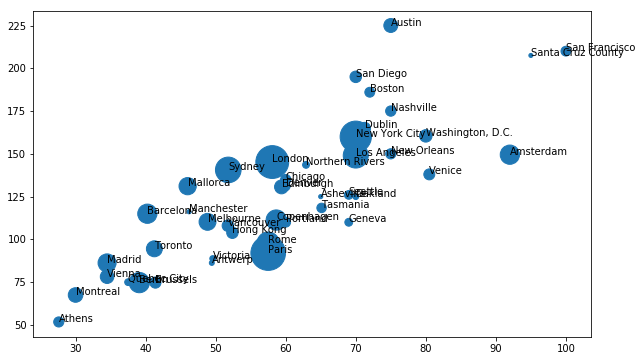

In [64]:
z = dfc["median_privateroom"]
y = dfc["median_entirehome"]
n = dfc["city"]
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(z, y, s=dfc["num_listings"]/50)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

### Hotel vs entire home in Airbnb

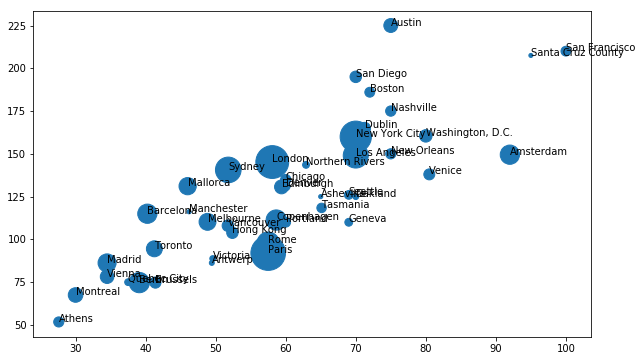

In [67]:
z = dfc["median_privateroom"]
y = dfc["median_entirehome"]
n = dfc["city"]
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(z, y, s=dfc["num_listings"]/50)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

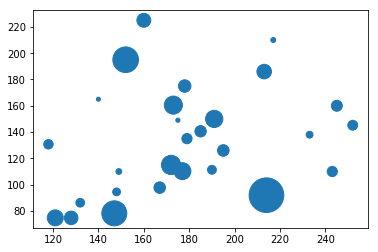

In [78]:
z = dfc.dropna()["avg_hotel_price"]
y = dfc.dropna()["median_entirehome"]
n = dfc.dropna()["city"]
fig, ax = plt.subplots()
ax.scatter(z, y, s=dfc["num_listings"]/50)

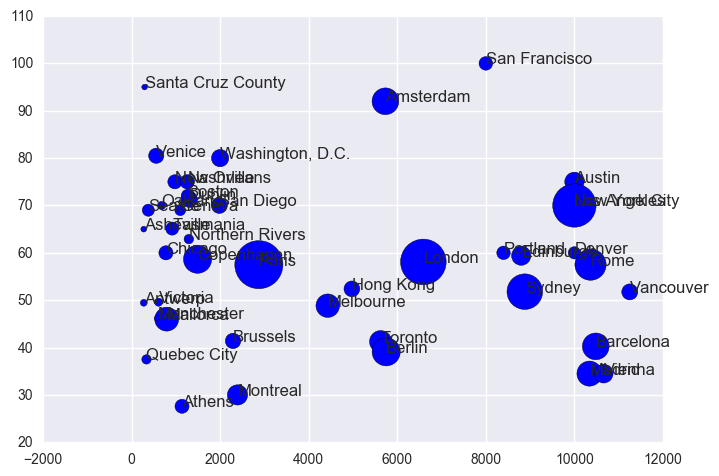

In [218]:
z = dfc["range_privateroom"]
y = dfc["median_privateroom"]
n = dfc["city"]
fig, ax = plt.subplots()
ax.scatter(z, y, s=dfc["num_listings"]/50)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

### Comparison with hotel prices

In [110]:
dfc["airbnb_hotel_diff"] = dfc["median_entirehome"] - dfc["avg_hotel_price"]
dfc[["city", "airbnb_hotel_diff"]].sort_values(by="airbnb_hotel_diff", ascending=False).dropna()

,city,airbnb_hotel_diff
2,Austin,65.00
25,San Diego,43.00
6,Dublin,25.00
30,Edinburgh,12.68
42,Nashville,-3.00
32,San Francisco,-7.00
28,"Washington, D.C.",-12.50
14,Los Angeles,-26.00
21,Boston,-27.00
15,Portland,-39.00


In [112]:
df_airbnb_hotel_diff = dfc[["city", "us_eu", "median_entirehome", "avg_hotel_price", "airbnb_hotel_diff", "num_listings"]].copy()
df_airbnb_hotel_diff.dropna(inplace=True)
df_airbnb_hotel_diff[["median_entirehome", "avg_hotel_price", "airbnb_hotel_diff"]] = np.round(df_airbnb_hotel_diff[["median_entirehome", "avg_hotel_price", "airbnb_hotel_diff"]],0)
df_airbnb_hotel_diff["median_entirehome"] = df_airbnb_hotel_diff["median_entirehome"].astype(int)
df_airbnb_hotel_diff["avg_hotel_price"] = df_airbnb_hotel_diff["avg_hotel_price"].astype(int)
df_airbnb_hotel_diff["airbnb_hotel_diff"] = df_airbnb_hotel_diff["airbnb_hotel_diff"].astype(int)
df_airbnb_hotel_diff["num_listings"] = df_airbnb_hotel_diff["num_listings"].astype(int)
df_airbnb_hotel_diff["us_eu"] = df_airbnb_hotel_diff["us_eu"].astype(int)
df_airbnb_hotel_diff.loc[df_airbnb_hotel_diff["city"]=="Washington, D.C.","city"] = "Washington D.C."
excluded_cities_hotel_comparison = ["Sydney", "Melbourne", "Brussels", "New Orleans"]
df_airbnb_hotel_diff = df_airbnb_hotel_diff[~df_airbnb_hotel_diff["city"].isin(excluded_cities_hotel_comparison)]
df_airbnb_hotel_diff.to_csv("../code/data/airbnb_hotel_diff.csv", index=False)
df_airbnb_hotel_diff

,city,us_eu,median_entirehome,avg_hotel_price,airbnb_hotel_diff,num_listings
0,Barcelona,1,115,172,-57,18531
1,Paris,1,92,214,-122,59945
2,Austin,0,225,160,65,9663
6,Dublin,1,165,140,25,6729
11,Seattle,0,126,195,-69,3818
12,Chicago,0,135,179,-44,5207
14,Los Angeles,0,149,175,-26,31253
15,Portland,0,110,149,-39,4738
18,Madrid,1,86,132,-46,16313
19,Geneva,1,110,243,-133,3060


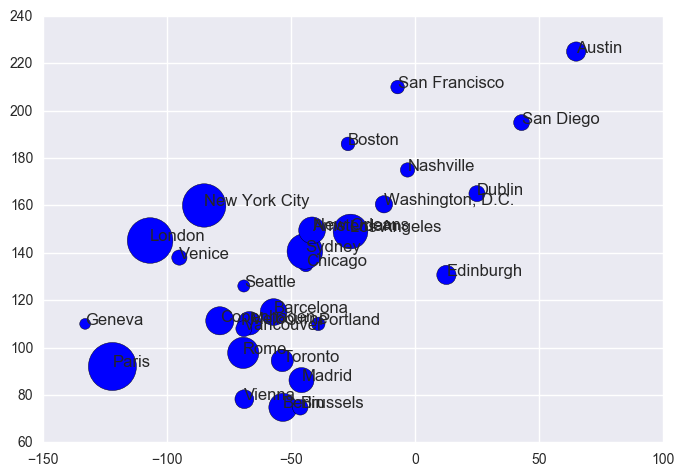

In [252]:
z = dfc["airbnb_hotel_diff"]
y = dfc["median_entirehome"]
n = dfc["city"]
fig, ax = plt.subplots()
ax.scatter(z, y, s=dfc["num_listings"]/50)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

In [258]:
dfc[["city","total_income"]].sort_values("total_income", ascending=False)

,city,total_income
36,New York City,7050195.00
1,Paris,6904735.70
31,London,6837803.28
14,Los Angeles,5628479.00
16,Sydney,5005323.00
35,Amsterdam,3031296.50
2,Austin,2829215.00
34,Rome,2601480.55
5,Mallorca,2437644.65
38,Copenhagen,2335913.10


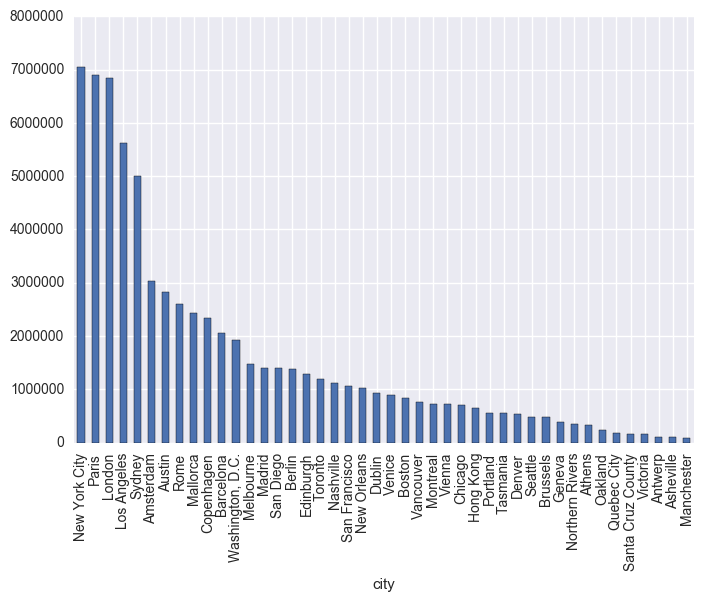

In [263]:
dfc.set_index("city")["total_income"].sort_values(ascending=False).plot(kind="bar")

### Commercial ?

#### Room type distribution: Fraction of listings as entire room/apartment

In [273]:
dfc[["city","frac_entireapt"]].sort_values("frac_entireapt", ascending=False)

,city,frac_entireapt
5,Mallorca,0.874680
1,Paris,0.868413
40,Athens,0.832456
7,New Orleans,0.828188
38,Copenhagen,0.806814
35,Amsterdam,0.792743
20,Tasmania,0.762503
42,Nashville,0.761628
26,Venice,0.748797
22,Antwerp,0.700081


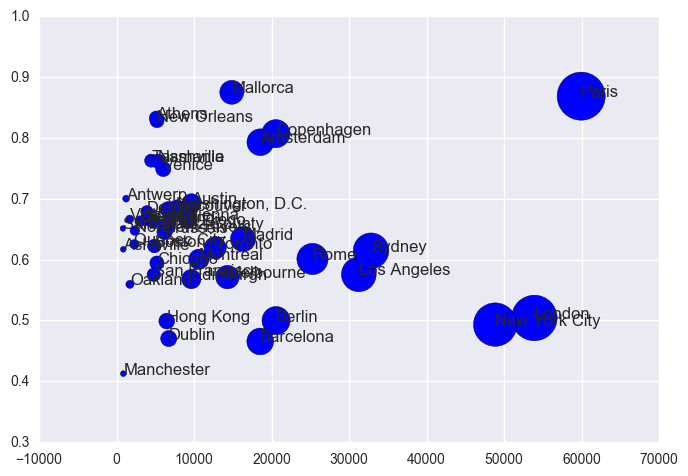

In [275]:
z = dfc["num_listings"]
y = dfc["frac_entireapt"]
n = dfc["city"]
fig, ax = plt.subplots()
ax.scatter(z, y, s=dfc["num_listings"]/50)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

In [6]:
dfl["city"].unique()

array(['Barcelona', 'Paris', 'Austin', 'Melbourne', 'Santa Cruz County',
       'Mallorca', 'Dublin', 'New Orleans', 'Asheville', 'Victoria',
       'Hong Kong', 'Seattle', 'Chicago', 'Montreal', 'Los Angeles',
       'Portland', 'Sydney', 'Northern Rivers', 'Madrid', 'Geneva',
       'Tasmania', 'Boston', 'Antwerp', 'Vienna', 'Vancouver',
       'San Diego', 'Venice', 'Denver', 'Washington, D.C.', 'Toronto',
       'Edinburgh', 'London', 'San Francisco', 'Berlin', 'Rome',
       'Amsterdam', 'New York City', 'Manchester', 'Copenhagen',
       'Quebec City', 'Athens', 'Oakland', 'Nashville', 'Brussels'],
      dtype=object)

### The fraction of users who rent out more than one room or flat

In [27]:
import pandas as pd
#dfl = pd.read_csv("/Users/nesara/Documents/etc/airbnb/data/all_listings.csv")

idx = 0
dfcu = pd.DataFrame()

for city in dfl["city"].unique():
    print(city)
    
    dfcity = dfl[(dfl["city"]==city) & (dfl["room_type"]!="Shared room")]

    dfhost_num = dfcity[["host_id","host_name","id"]].groupby(["host_name","host_id"]).count()["id"].reset_index().sort_values("id", ascending=False)
    dfhost_num.rename(columns={"id":"num_listings"}, inplace=True)
    #dfhost_num = dfhost_num[dfhost_num["num_listings"]>2]

    dfcu.at[idx, "city"] = city
    dfcu.at[idx, "num_listings"] = len(dfcity)
    dfcu.at[idx, "us_eu"] = dfcity["us_eu"].unique()
    dfcu.at[idx, "frac_of_users_more_than_one"] = len(dfhost_num[dfhost_num["num_listings"]>1])/len(dfhost_num)
    dfcu.at[idx, "frac_entireapt"] = len(dfcity[dfcity["room_type"]=="Entire home/apt"])/len(dfcity)
    idx += 1

dfcu["frac_of_users_more_than_one"] = np.round(dfcu["frac_of_users_more_than_one"]*100)
dfcu["frac_entireapt"] = np.round(dfcu["frac_entireapt"]*100)

Barcelona
Paris
Austin
Melbourne
Santa Cruz County
Mallorca
Dublin
New Orleans
Asheville
Victoria
Hong Kong
Seattle
Chicago
Montreal
Los Angeles
Portland
Sydney
Northern Rivers
Madrid
Geneva
Tasmania
Boston
Antwerp
Vienna
Vancouver
San Diego
Venice
Denver
Washington, D.C.
Toronto
Edinburgh
London
San Francisco
Berlin
Rome
Amsterdam
New York City
Manchester
Copenhagen
Quebec City
Athens
Oakland
Nashville
Brussels


In [31]:
import numpy as np

dfcu["frac_of_users_more_than_one"] = dfcu["frac_of_users_more_than_one"].astype(int)
dfcu["frac_entireapt"] = dfcu["frac_entireapt"].astype(int)
dfcu["us_eu"] = dfcu["us_eu"].astype(int)

non_us_eu_cities = ["Hong Kong", "Montreal", "Melbourne", "Sydney", "Northern Rivers", "Toronto", "Quebec City", "Vancouver", "Victoria", "Tasmania"]
dfcu = dfcu[~dfcu["city"].isin(non_us_eu_cities)]

dfcu.to_csv("../code/data/city_commercial.csv", index=False)

<Figure size 864x864 with 0 Axes>

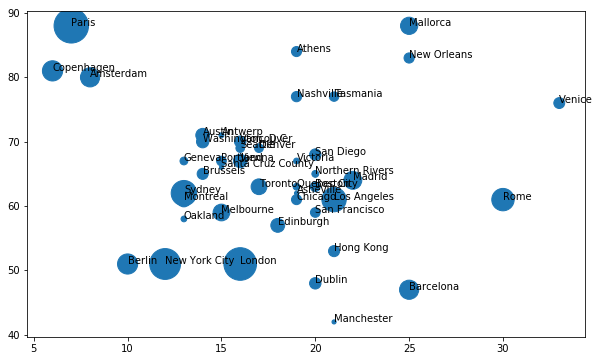

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

plt.figure(figsize=(12,12))

z = dfcu["frac_of_users_more_than_one"]
y = dfcu["frac_entireapt"]
n = dfcu["city"]
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(z, y, s=dfcu["num_listings"]/50)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

### Types of listings offered by hosts

In [7]:
for city in dfl["city"].unique():
    print(city)
    
    dfcity = dfl[(dfl["city"]==city) & (dfl["room_type"]!="Shared room")]

    dfhost_num = dfcity[["host_id","host_name","id"]].groupby(["host_name","host_id"]).count()["id"].reset_index().sort_values("id", ascending=False)
    dfhost_num.rename(columns={"id":"num_listings"}, inplace=True)
    dfhost_num = dfhost_num[dfhost_num["num_listings"]>2]

    dfhost_percent = pd.DataFrame()
    idx = 0
    for hostid in dfhost_num["host_id"].unique():
        dfh = dfcity[dfcity["host_id"]==hostid]
        num_privateroom = len(dfh[dfh["room_type"]=="Private room"])
        num_entireapt = len(dfh[dfh["room_type"]=="Entire home/apt"])
        num_entireapt_privateroom = len(dfh[(dfh["room_type"]=="Entire home/apt") | (dfh["room_type"]=="Private room")])
        dfhost_percent.at[idx, "host_id"] = hostid
        #dfhost_percent.at[idx, "per_entireapt"] = np.ceil(num_entireapt / num_entireapt_privateroom * 100)
        if num_entireapt == 0:
            colorid = 0
        elif num_privateroom == 0:
            colorid = 1
        else:
            colorid = 2
        dfhost_percent.at[idx, "color_id"] = colorid
        idx += 1
    #dfhost_percent["per_entireapt"] = dfhost_percent["per_entireapt"].astype(int)
    dfhost_percent["color_id"] = dfhost_percent["color_id"].astype(int)

    dfhost = dfhost_num.set_index("host_id").join(dfhost_percent.set_index("host_id")).reset_index()

    text = []
    for i in range(len(dfhost)):
        #text.append(city+"."+str(dfhost.iloc[i]["host_name"])+","+str(dfhost.iloc[i]["num_listings"])+","+str(dfhost.iloc[i]["per_entireapt"]))
        text.append(city+"."+str(dfhost.iloc[i]["host_name"])+","+str(dfhost.iloc[i]["num_listings"])+","+str(dfhost.iloc[i]["color_id"]))
    #savefilepath = "/Volumes/EXT64/backup/aim/journalism/articles/airbnb/code/startbootstrap-grayscale-gh-pages/data/cities/"+city+"/numlistings_per_host_all.csv"
    savefilepath = "../code/data/cities/"+city+"/numlistings_per_host_ordinal.csv"
    with open(savefilepath,'w') as file:
        file.write("id,value,colorid\n")
        for line in text:
            file.write(line)
            file.write('\n')


Barcelona
Paris
Austin
Melbourne
Santa Cruz County
Mallorca
Dublin
New Orleans
Asheville
Victoria
Hong Kong
Seattle
Chicago
Montreal
Los Angeles
Portland
Sydney
Northern Rivers
Madrid
Geneva
Tasmania
Boston
Antwerp
Vienna
Vancouver
San Diego
Venice
Denver
Washington, D.C.
Toronto
Edinburgh
London
San Francisco
Berlin
Rome
Amsterdam
New York City
Manchester
Copenhagen
Quebec City
Athens
Oakland
Nashville
Brussels


In [430]:
numlistings = {}
for city in dfl["city"].unique():
    numlistings[city] = len(dfl[dfl["city"]==city])
numlistings

{'Amsterdam': 18547,
 'Antwerp': 1227,
 'Asheville': 864,
 'Athens': 5127,
 'Austin': 9663,
 'Barcelona': 18531,
 'Berlin': 20576,
 'Boston': 4870,
 'Brussels': 6192,
 'Chicago': 5207,
 'Copenhagen': 20545,
 'Denver': 3918,
 'Dublin': 6729,
 'Edinburgh': 9638,
 'Geneva': 3060,
 'Hong Kong': 6474,
 'London': 53904,
 'Los Angeles': 31253,
 'Madrid': 16313,
 'Mallorca': 14858,
 'Manchester': 865,
 'Melbourne': 14305,
 'Montreal': 10619,
 'Nashville': 5332,
 'New Orleans': 5215,
 'New York City': 48852,
 'Northern Rivers': 2350,
 'Oakland': 1718,
 'Paris': 59945,
 'Portland': 4738,
 'Quebec City': 2297,
 'Rome': 25275,
 'San Diego': 6608,
 'San Francisco': 4804,
 'Santa Cruz County': 814,
 'Seattle': 3818,
 'Sydney': 32830,
 'Tasmania': 4459,
 'Toronto': 12714,
 'Vancouver': 6651,
 'Venice': 6027,
 'Victoria': 1691,
 'Vienna': 9201,
 'Washington, D.C.': 7788}

### Network map

In [4]:
for city in dfl["city"].unique():
    print(city)
    dfcity = dfl[(dfl["city"]==city) & (dfl["room_type"]!="Shared room")]
    dfhost_num = dfcity[["host_id","host_name","id"]].groupby(["host_name","host_id"]).count()["id"].reset_index().sort_values("id", ascending=False)
    dfhost_num.rename(columns={"id":"num_listings"}, inplace=True)
    dfhost_num = dfhost_num[:5]
    data = []
    hostidx = 0
    for h in dfhost_num["host_id"].unique():
        dfh = dfcity[dfcity["host_id"]==h]
        for l in range(len(dfh)):
            d = {}
            d["coords"] = [dfh.iloc[l]["latitude"], dfh.iloc[l]["longitude"]]
            d["hostid"] = hostidx
            data.append(d)
        hostidx+=1

    import json
    savefilepath = "/Volumes/EXT64/backup/aim/journalism/articles/airbnb/code/startbootstrap-grayscale-gh-pages/data/cities/"+city+"/top_hosts.json"    

    with open(savefilepath, 'w') as outfile:
        json.dump(data, outfile)

Barcelona
Paris
Austin
Melbourne
Santa Cruz County
Mallorca
Dublin
New Orleans
Asheville
Victoria
Hong Kong
Seattle
Chicago
Montreal
Los Angeles
Portland
Sydney
Northern Rivers
Madrid
Geneva
Tasmania
Boston
Antwerp
Vienna
Vancouver
San Diego
Venice
Denver
Washington, D.C.
Toronto
Edinburgh
London
San Francisco
Berlin
Rome
Amsterdam
New York City
Manchester
Copenhagen
Quebec City
Athens
Oakland
Nashville
Brussels


In [16]:
dflll = {}
for key in dfll.keys():
    dflll[key] = [dfll[key][1], dfll[key][0]]

In [17]:
dflll

{'Amsterdam': [52.365016079866514, 4.888966107423247],
 'Antwerp': [51.21378555624961, 4.4139292272680315],
 'Asheville': [35.58184654887986, -82.5587339314082],
 'Athens': [37.98119798246257, 23.733934324075236],
 'Austin': [30.27605926262372, -97.75133593986969],
 'Barcelona': [41.39243462700611, 2.16711400548186],
 'Berlin': [52.5096704706105, 13.407150440988978],
 'Boston': [42.3399986684652, -71.08394332204757],
 'Brussels': [50.83797601447168, 4.363338150969672],
 'Chicago': [41.906927834816614, -87.66352711414041],
 'Copenhagen': [55.681294015165015, 12.557519057929465],
 'Denver': [39.73798024121983, -104.97656336110967],
 'Dublin': [53.34431179562305, -6.2537809488665745],
 'Edinburgh': [55.950857265335024, -3.1973785954433964],
 'Geneva': [46.20549787348727, 6.1440413105530665],
 'Hong Kong': [22.301690926324323, 114.15933711880362],
 'London': [51.51042472724741, -0.12710484279376477],
 'Los Angeles': [34.05622035779748, -118.33425165122814],
 'Madrid': [40.42058336311059, -

### Neighbourhood wise price

In [74]:
def csv2geojson_price(dfn, city):
    features = []
    for i in range(len(dfn)):
        if dfn.iloc[i]["features"]["geometry"]:
            coordinates = dfn.iloc[i]["features"]["geometry"]["coordinates"]

            features.append(
                Feature(
                    geometry = {
                        'type': "MultiPolygon",
                        'coordinates': geojson.MultiPolygon((coordinates)),  
                    },
                    properties = {
                        'neighbourhood': dfn.iloc[i]["features"]["properties"]["neighbourhood"],
                        'neighbourhood_group': dfn.iloc[i]["features"]["properties"]["neighbourhood_group"],
                        'median_price': float(dfn.iloc[i]["features"]["properties"]["median_price"])
                    }
                )
            )
    collection = FeatureCollection(features)
    #with open("/Users/nesara/Documents/etc/airbnb/data/cities/"+city+"/neighbourhoods_price.geojson", "w") as f:
    with open("/Volumes/EXT64/backup/aim/journalism/articles/airbnb/code/startbootstrap-grayscale-gh-pages/data/cities/"+city+"/neighbourhoods_price.geojson", "w") as f:
        f.write('%s' % collection)

In [76]:
allListings = pd.read_csv("/Users/nesara/Documents/etc/airbnb/data/all_listings.csv")

for city in allListings["city"].unique():
    print(city)
    ### Read listings file and count number of listings
    dfl = pd.read_csv("/Users/nesara/Documents/etc/airbnb/data/cities/"+city+"/listings.csv")

    dflc = dfl.groupby("neighbourhood").median()["price"].reset_index()
    dflc.rename(columns={"price":"median_price"}, inplace=True)
    
    ### Read neighbourhood geojson file
    dfn = pd.read_json("/Users/nesara/Documents/etc/airbnb/data/cities/"+city+"/neighbourhoods.geojson")
    dfl["neighbourhood"] = dfl["neighbourhood"].astype(str)
    dflc["neighbourhood"] = dflc["neighbourhood"].astype(str)
    
    ### Append number of listings data
    for i in range(len(dfn)):
        neighbourhood = dfn.iloc[i]["features"]["properties"]["neighbourhood"]
        if len(dfl[dfl["neighbourhood"]==neighbourhood])!=0:
            median_price = dflc[dflc["neighbourhood"]==neighbourhood]["median_price"].values[0]
        else:
            median_price = dflc["median_price"].mean()
        dfn.iloc[i]["features"]["properties"]["median_price"] = median_price

        

    ### Write results as a FeatureCollection to a geojson filefrom geojson import Feature, FeatureCollection, Point
    csv2geojson_price(dfn, city)


/Applications/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Barcelona
Paris
Austin
Melbourne
Santa Cruz County
Mallorca
Dublin
New Orleans
Asheville
Victoria
Hong Kong
Seattle
Chicago
Montreal
Los Angeles
Portland
Sydney
Northern Rivers
Madrid
Geneva
Tasmania
Boston
Antwerp
Vienna
Vancouver
San Diego
Venice
Denver
Washington, D.C.
Toronto
Edinburgh
London
San Francisco
Berlin
Rome
Amsterdam
New York City
Manchester
Copenhagen
Quebec City
Athens
Oakland
Nashville
Brussels


### Number of listings by top 5 hosts

In [8]:
import json
cities_path = "../code/data/cities/"

In [51]:
df_numlistings_top5hosts = pd.DataFrame() 
idx = 0

for city in os.listdir(cities_path):
    if city not in excluded_cities:
        top_hosts_file = cities_path + city + "/top_hosts.json"
        with open(top_hosts_file) as fp:
            data = json.load(fp)
        top5hosts = pd.DataFrame(data).groupby("hostid").count().reset_index()["coords"]
        numlistings_top5hosts = top5hosts.sum()
        df_numlistings_top5hosts.at[idx, "id"] = "city." + city
        df_numlistings_top5hosts.at[idx, "value"] = numlistings_top5hosts
        df_numlistings_top5hosts.at[idx, "city"] = city
        for host in range(5):
            df_numlistings_top5hosts.at[idx, "host"+str(host)] = top5hosts[host] 
        idx += 1
df_numlistings_top5hosts.sort_values(by="value", ascending=False, inplace=True)    
df_numlistings_top5hosts.to_csv("../code/data/num_listings_top5hosts.csv", index=False)

In [52]:
df_numlistings_top5hosts

,id,value,city,host0,host1,host2,host3,host4
4,city.Mallorca,1433.0,Mallorca,752.0,224.0,193.0,135.0,129.0
26,city.London,1124.0,London,711.0,133.0,101.0,94.0,85.0
13,city.Sydney,676.0,Sydney,181.0,180.0,117.0,108.0,90.0
16,city.Boston,542.0,Boston,181.0,147.0,84.0,76.0,54.0
14,city.Madrid,499.0,Madrid,179.0,101.0,79.0,76.0,64.0
0,city.Barcelona,491.0,Barcelona,150.0,122.0,76.0,72.0,71.0
1,city.Paris,482.0,Paris,134.0,114.0,85.0,75.0,74.0
6,city.New Orleans,444.0,New Orleans,124.0,111.0,86.0,86.0,37.0
30,city.Amsterdam,387.0,Amsterdam,112.0,91.0,74.0,58.0,52.0
29,city.Rome,379.0,Rome,105.0,99.0,66.0,55.0,54.0


In [37]:
pd.DataFrame(data).groupby("hostid").count().reset_index()["coords"][0]

58

### Cover image

In [65]:
import imageio
images = []
img_path = "../code/img/cover/"
for fp in os.listdir(img_path):
    filename = img_path + fp
    if filename.endswith(".jpg"):
        images.append(imageio.imread(filename))
imageio.mimsave('../code/img/cover.gif', images, duration=2)

In [57]:
img_path

'../code/img/cover/'